# Linear Regression: From Theory to Practice

## 1. Introduction

Linear Regression is a fundamental supervised learning algorithm in machine learning used for predicting a continuous target variable based on one or more input features. In its simplest form (simple linear regression), it models the relationship between two variables using a straight line.

---

## 2. Problem Statement

Given a dataset of pairs \((x_i, y_i)\), learn a function:
\[
y = wx + b
\]
that best fits the data, where \(w\) is the weight (slope), and \(b\) is the bias (intercept).

---

## 3. Imports and Dataset



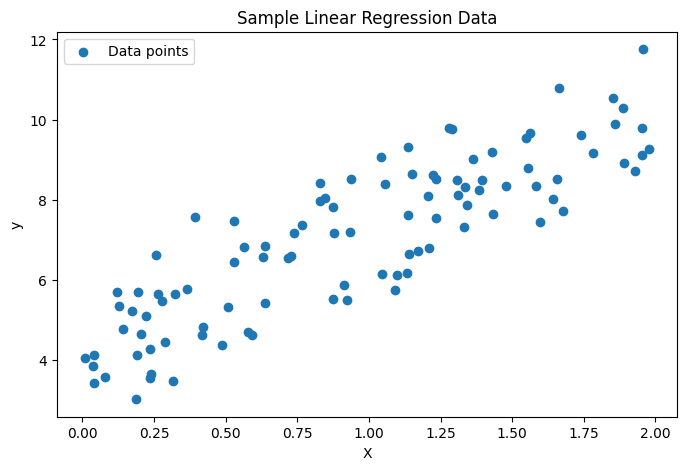

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data generation (synthetic for illustration)
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample Linear Regression Data")
plt.legend()
plt.show()



---

## 4. Hypothesis Function

The model makes predictions as:  
\[
\hat{y}_i = wx_i + b
\]
where:

- \( x_i \): input feature of i-th example  
- \( w \): weight (slope)  
- \( b \): bias (intercept)  
- \( \hat{y}_i \): predicted value  

---

## 5. Cost Function

To measure prediction error, we use the Mean Squared Error (MSE):  
\[
J(w,b) = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
\]

Where:  
- \(N\): Number of data points  
- \(y_i\): Actual value  
- \(\hat{y}_i\): Predicted value  

---

## 6. Implementing the Cost Function



In [3]:
def compute_cost(X, y, w, b):
    N = len(y)
    y_pred = w * X + b
    cost = (1/N) * np.sum((y_pred - y)**2)
    return cost

# Test the function
cost = compute_cost(X, y, w=0, b=0)
print("Initial Cost (w=0, b=0):", cost)


Initial Cost (w=0, b=0): 53.330318695242276



---

## 7. Gradient Descent

To minimize the cost function, the parameters \(w\) and \(b\) are updated iteratively using gradient descent.

Update rules:  
\[
w := w - \alpha \cdot \frac{\partial J}{\partial w}
\]  
\[
b := b - \alpha \cdot \frac{\partial J}{\partial b}
\]  

Where \(\alpha\) is the learning rate.

---

## 8. Implementing Gradient Descent



In [4]:
def gradient_descent(X, y, w_init=0, b_init=0, learning_rate=0.1, n_iters=100):
    w, b = w_init, b_init
    N = float(len(y))
    cost_history = []

    for i in range(n_iters):
        y_pred = w * X + b
        dw = (2/N) * np.sum((y_pred - y) * X)
        db = (2/N) * np.sum(y_pred - y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

# Run gradient descent
w_final, b_final, history = gradient_descent(X, y, learning_rate=0.1, n_iters=200)
print(f"Learned parameters: w = {w_final:.3f}, b = {b_final:.3f}")


Learned parameters: w = 2.970, b = 4.221



---

## 9. Visualize Cost Decrease



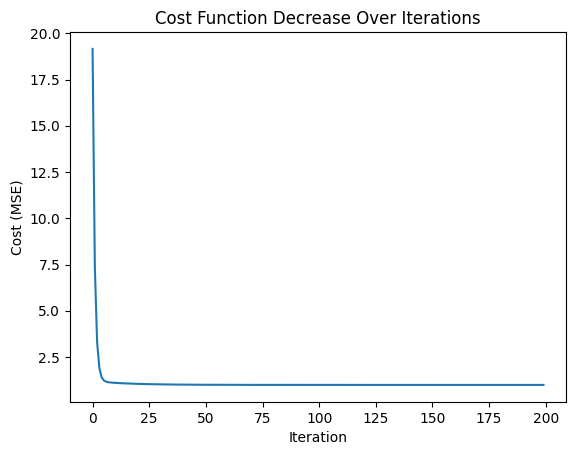

In [5]:
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Decrease Over Iterations')
plt.show()



---

## 10. Visualize Best-Fit Line



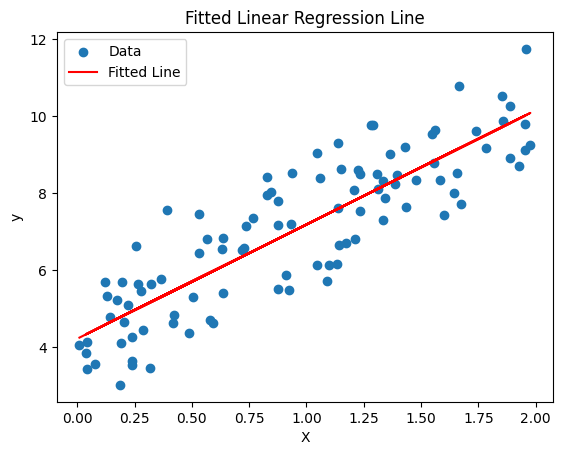

In [6]:
plt.scatter(X, y, label="Data")
plt.plot(X, w_final * X + b_final, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Fitted Linear Regression Line")
plt.legend()
plt.show()



---

## 11. Predict and Evaluate



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = w_final * X + b_final
print("MSE:", mean_squared_error(y, y_pred))
print("R^2 Score:", r2_score(y, y_pred))


MSE: 0.9924391188743472
R^2 Score: 0.7469628726788108



---

## 12. Using scikit-learn



scikit-learn: w = 2.968, b = 4.222


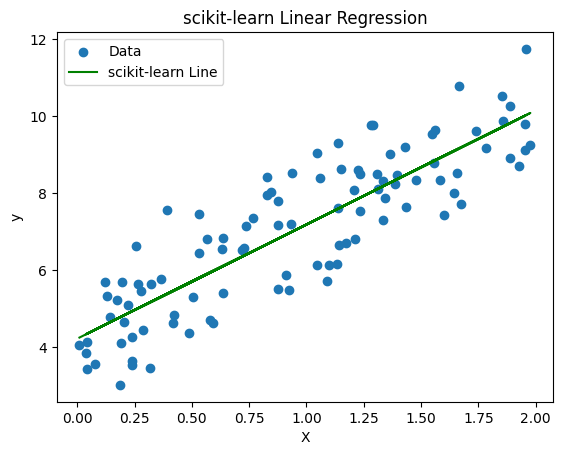

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print(f"scikit-learn: w = {model.coef_[0][0]:.3f}, b = {model.intercept_[0]:.3f}")
y_pred_sklearn = model.predict(X)

# Visualize
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred_sklearn, color='green', label="scikit-learn Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("scikit-learn Linear Regression")
plt.legend()
plt.show()



---

## 13. Summary and Takeaways

- **Linear Regression** models continuous variables using a linear relationship.
- **Gradient descent** is a standard way to optimize the weight and bias.
- **MSE** is the loss function commonly used.
- **scikit-learn** can be used for efficient implementation and comparison.

---

## 14. Further Reading/References

- Elements of Statistical Learning (Hastie, Tibshirani, Friedman)
- ISLR: An Introduction to Statistical Learning
- scikit-learn Documentation

